# SPARQL

## Introduction

This notebook will go over some concepts for querying the graph that is generated by the Ocean InfoHub.

The product of the publishing and indexing process is a graph.  This graph follows the W3C Resource Description
Framework (RDF).   RDF is a data model that can be represented in various text encodings.  Among these
is the JSON-LD format we have been using in the publishing process.  

Not all graph libraries and databases support JSON-LD yet, so as part of the aggregation process one step 
is to simply translate this format into a format that is supported by the graph database.   Typically we 
use something n-triples or turtle for this.  There are many tools for translating RDF from one format to another. 

We can load the graphs into a graph database and this was documented in the Aggregation section, so we will not
revisit it here.    In this notebook, we will load the graph into a local graph database in the Python library
that also supports the same query language our graph databases use.  This will make the demonstration easier and 
allow you to download and run this notebook on your own machine if you wish.  The query language we will use 
is SPARQL.  

## SPARQL

SPARQL (SPARQL Protocol and RDF Query Language) is the query language that is used to query RDF graphs.  It 
is a W3C recommendation documented at [SPARQL 1.1 Query Language](https://www.w3.org/TR/sparql11-query/).  

## Load a Graph

For this demonstration we will be using Python to load the graph and do our queries.  However, there are many 
languages and libraries for working with graphs and SPARQL.   Also, you can often query a graph using web UIs 
infront of your graph database or even with simple direct HTTP requests.  Examples of some of these can be
found in other sections of the OIH documentation.  




In [1]:
import rdflib

g = rdflib.Graph()
g.parse("../tooling/notebooks/data/oceanexperts_graph.ttl", format="ttl")

<Graph identifier=N9656cde6c1054a4ba02f9bbcd09d17a8 (<class 'rdflib.graph.Graph'>)>

# Let's define our first query

This is a simple query that will return all the triples in the graph.   Recall an RDF graph is make of triples defined by a subject, predicate and object.  You can review RDF at the W3C RDF Primer (https://www.w3.org/TR/rdf11-concepts/).  SPARQL allows us to do a type of pattern matching on the graph by defining a pattern we a relooking for.  

Here we define ```?s ?p ?o``` as the pattern we are looking for.  The ```?``` is a variable that can be used to match any value.  In this case, we are looking for all the triples in the graph.  We have used s, p and o to as simple names for our subject, predicate, object elements of the RDF triple.  

Since this would match ALL the values in the graph, which would be a lot, we have added a LIMIT option to reduce the number of resutls returned.

You could also try these queries at: [https://oceans.collaborium.io/sparql.html](https://oceans.collaborium.io/sparql.html)


In [2]:
s1 = """
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
    }
    LIMIT 3
"""

# Run the query

We will run this query, and print out the results

In [3]:
from icecream import ic

for row in g.query(s1):
    ic(row.asdict())

ic| row.asdict(): {'o': rdflib.term.Literal('2014-06-02'),
                   'p': rdflib.term.URIRef('https://schema.org/startDate'),
                   's': rdflib.term.BNode('n0dfe00a0174f48a7b9fb702b5f5b4ecdb236')}
ic| row.asdict(): {'o': rdflib.term.Literal(' Copenhagen Denmark '),
                   'p': rdflib.term.URIRef('https://schema.org/address'),
                   's': rdflib.term.BNode('n0dfe00a0174f48a7b9fb702b5f5b4ecdb496')}
ic| row.asdict(): {'o': rdflib.term.Literal('Introduction to Ocean Data Management for Students of the Environment Group II'),
                   'p': rdflib.term.URIRef('https://schema.org/name'),
                   's': rdflib.term.BNode('n0dfe00a0174f48a7b9fb702b5f5b4ecdb1745')}


# Nicer formatting

We can do a bit of formatting to see our results in a nicer way.  

In [4]:
for row in g.query(s1):
    s = row["s"].n3()
    p = row["p"].n3()
    o = row["o"].n3()

    ic(s, p, o)

ic| s: '_:n0dfe00a0174f48a7b9fb702b5f5b4ecdb236'
    p: '<https://schema.org/startDate>'
    o: '"2014-06-02"'
ic| s: '_:n0dfe00a0174f48a7b9fb702b5f5b4ecdb496'
    p: '<https://schema.org/address>'
    o: '" Copenhagen Denmark "'
ic| s: '_:n0dfe00a0174f48a7b9fb702b5f5b4ecdb1745'
    p: '<https://schema.org/name>'
    o: ('"Introduction to Ocean Data Management for Students of the Environment Group '
        'II"')


# KGLab

As mentioned, this intro is based on the nice work done by KGLab (https://derwen.ai/docs/kgl/) both in their library and documentation.  We wll import kglab here and take advantage of some of their nice features.  In particular some nice functioons to load our graph and query it with results into a Dataframe. 

In [5]:
import kglab

namespaces = {
    "schema":  "https://schema.org/",
    }

kg = kglab.KnowledgeGraph(
    name = "Demonstration Graph",
    base_uri = "https://oceaninfohub.org/id/",
    namespaces = namespaces,
    )

kg.load_rdf("../tooling/notebooks/data/oceanexperts_graph.ttl")

/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/owlrl/__init__.py:177: UserWarning: Code: dateTimeStamp is not defined in namespace XSD
  from . import DatatypeHandling, Closure
/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/owlrl/RDFSClosure.py:40: UserWarning: Code: dateTimeStamp is not defined in namespace XSD
  from owlrl.AxiomaticTriples import RDFS_Axiomatic_Triples, RDFS_D_Axiomatic_Triples
/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/owlrl/RDFSClosure.py:40: UserWarning: Code: length is not defined in namespace XSD
  from owlrl.AxiomaticTriples import RDFS_Axiomatic_Triples, RDFS_D_Axiomatic_Triples
/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/owlrl/RDFSClosure.py:40: UserWarning: Code: maxExclusive is not defined in namespace XSD
  from owlrl.AxiomaticTriples import RDFS_Axiomatic_Triples, RDFS_D_Axiomatic_Triples
/home/fils/.conda/envs/kglab/lib/python3.8/site-packages/owlrl/RDFSClosure.py:40: UserWarning: Code: maxInclusive is not d

# PREFIX

Let's do another query.  We will use the PREFIX keyword to define a prefix for the namespace.  This is a way to leverage namespace in our query.  Note the use of schema:name vs the <https://schema.org/location>.  The latter is a URI and the former is a prefix.  The prefix is defined in the PREFIX keyword.   The schema:name is the name of the property that we are querying, the prefix can expand it to a URI.  The <https://schema.org/location> is the URI of the property directly, without use of a prefix.   Both work, the prefix can simply make life easier for you and also help avoid hard to find typos where you may miss-type a URI.  

Let's do a query to see all the location names in our group for training.  

In [6]:
s2 = """
PREFIX schema: <https://schema.org/>
SELECT DISTINCT ?locname
  WHERE {
      ?s rdf:type <https://schema.org/Course> .
      ?s  <https://schema.org/location> ?location .
      ?location schema:name ?locname .
  }
  """

In [7]:
import pandas as pd
pd.set_option("max_rows", None)

df = kg.query_as_df(s2)
df.head(5)

,locname
0,Lima Peru
1,Qingdao China
2,Russia
3,"Playa del Secreto Puerto Morelos, Mexico"
4,University of Ghent Ghent Belgium


# Location Counts

The above is nice, but it doesn't tell us much about the number of events in each location. We can modify our query to do this.  We can leverage the COUNT and GROUP BY capacity of SPARQL to do this.  We can then add in ORDER BY to sort the results.

In [8]:
s3 = """
SELECT DISTINCT ?locname (COUNT(?locname) AS ?count)
  WHERE {
      ?s rdf:type <https://schema.org/Course> .
      ?s  <https://schema.org/location> ?location .
      ?location <https://schema.org/name> ?locname .
  }
  GROUP BY ?locname
  ORDER BY DESC(?count)
  """

In [9]:
import pandas as pd
pd.set_option("max_rows", None)

df = kg.query_as_df(s3)
df.head(5)

,locname,count
0,UNESCO/IOC Project Office for IODE Wandelaark...,28
1,Russia,27
2,UNESCO/IOC Project Office for IODE Wandelaark...,22
3,Wandelaarkaai 7 8400 Oostende Belgium,13
4,Belgium,10


# FILTER

Graphs are great for showing relations between objects but our approaches to searching or selecting data can often leverage pattern matching on text strings.  We do have some tools in SPARQL for this in the form of FILTER.  We can use regex pattern in the FILTER to match text.  Let's use this to find all the locations with "Peru" in the name.

In the following we will do a simple FILTER with a regular expression, but you can also do things like:

``` 
SELECT DISTINCT ?s 
  WHERE {
      ?s rdf:type <https://schema.org/Course> .
      FILTER NOT EXISTS { ?s  <https://schema.org/hasCourseInstance> ?instance . }  
  }
```

which in a SPARQL query would require that a hasCourseInstance property is not defined for the Course.  That is, Courses that have had no instances made yet.  



In [10]:
s4 = """
SELECT DISTINCT ?locname (COUNT(?locname) AS ?count)
  WHERE {
      ?s rdf:type <https://schema.org/Course> .
      ?s  <https://schema.org/location> ?location .
      ?location <https://schema.org/name> ?locname .
      FILTER regex(?locname, ".Peru.", "i") .
  }
  GROUP BY ?locname
  """

In [11]:
import pandas as pd
pd.set_option("max_rows", None)

df4 = kg.query_as_df(s4)
df4.head(5)

,locname,count
0,Lima Peru,1
1,Dirección Hidrografía y Navegación de la Arma...,1
2,Hotel Palmetto Lima Perú Peru,1


# PERU

So we see we have three entries in our graph that have Peru in the name.  This is where connecting our group to a shared concept of what Peru is like the WikiData entry for Peru at https://www.wikidata.org/wiki/Q419 would help.  That's a topic for another day.   

# Dates

Let's look at the dates that are available in the graph. 

In [12]:
s5 = """
SELECT DISTINCT ?sdate (COUNT(?sdate) AS ?count)
  WHERE {
      ?s rdf:type <https://schema.org/Course> .
      ?s  <https://schema.org/hasCourseInstance> ?instance .
      ?instance  <https://schema.org/startDate> ?sdate .
  }
  GROUP BY ?sdate
  """

In [13]:
import pandas as pd
pd.set_option("max_rows", None)

df4 = kg.query_as_df(s5)
df4.head(5) # show some results

,sdate,count
0,2020-06-08,1
1,2011-05-03,1
2,2012-07-16,1
3,2007-07-12,1
4,2019-04-02,1


# A bit of Pandas

Here we will mix in a bit of Pandas to convert our dates to Pandas dates, group and plot.  This is not 
SPARQL but rather just some post processing in Pandas.  It does still give us an idea of some of the
information we can extract from our graph.

Also, when the graph is composed of multiple source we can still conduct the same search across 
a shared concept like https://schema.org/Course with CourseInstance connected to a date via startDate.  

This shared approach by Ocean InfoHub is developed to support the shared data and integration 
goals among the participants. 

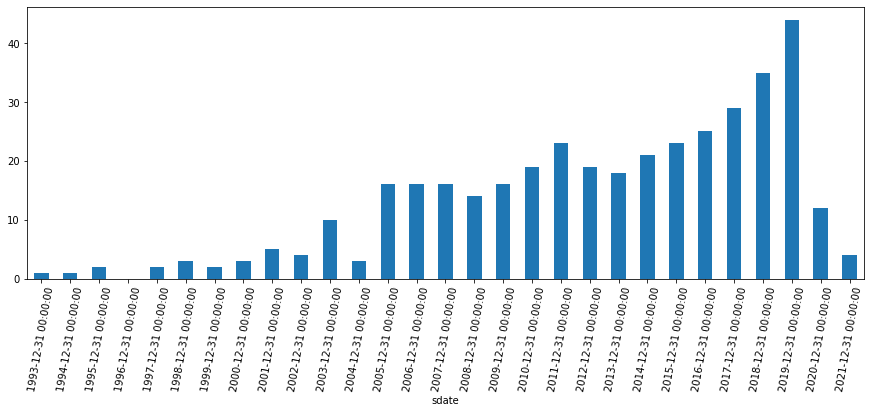

In [14]:
df4['count'] = df4["count"].astype(int) # convert count c to int
df4pd = df4.to_pandas()  # convert cudf dataframe to pandas dataframe
df4pd['sdate'] = pd.to_datetime(df4pd['sdate'], format='%Y-%m-%d')  # convert date to datetime
courseByYear = df4pd.groupby(pd.Grouper(key='sdate', freq='Y')).size() # group by year
ax = courseByYear.plot.bar(rot=80, stacked=True, figsize=(15, 5)) # plot


# More on Query

Here we have gone through an introdcution to the SPARQL query language and how to use it to query our graph.  
We can look at the SPARQL we use on the larger Ocean Infohub graph.  


# References

This is a just a quick overview of the SPARQL language.  You can find a large amount of information online.


* https://derwen.ai/docs/kgl/ex4_0/ 
* https://www.stardog.com/tutorials/getting-started-1/ 
* https://www.dataversity.net/introduction-to-sparql/ 
* https://www.slideshare.net/olafhartig/an-introduction-to-sparql 

